<a href="https://colab.research.google.com/github/jhonsnow456/TF2.0_Course/blob/master/05_TF2_0_ANN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_tain, x_test = x_train / 255.0, x_test / 255.0

print('shape of x_train: ', x_train.shape)

shape of x_train:  (60000, 28, 28)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [5]:
r = model.fit(x_tain, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2905 - accuracy: 0.9153 - val_loss: 0.1389 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1433 - accuracy: 0.9572 - val_loss: 0.0965 - val_accuracy: 0.9725
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1069 - accuracy: 0.9671 - val_loss: 0.0853 - val_accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0868 - accuracy: 0.9733 - val_loss: 0.0774 - val_accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0750 - accuracy: 0.9764 - val_loss: 0.0798 - val_accuracy: 0.9770
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9792 - val_loss: 0.0700 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0574 - accuracy: 0.9816 - val_loss: 0.0712 - val_accuracy

In [6]:
print('Train Score: ', model.evaluate(x_train, y_train))
print('Test Score: ', model.evaluate(x_test, y_test))

1875/1875 [==============================] - 4s 2ms/step - loss: 1.8587 - accuracy: 0.9944
Train Score:  [1.8587079048156738, 0.9944000244140625]
313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9794
Test Score:  [0.0722731426358223, 0.9793999791145325]


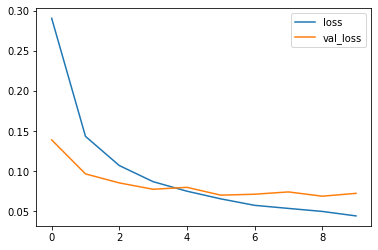

In [7]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.legend()

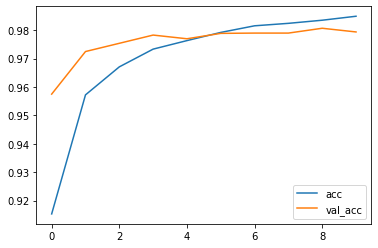

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.legend()

confusion matrix without normalization
[[ 972    0    1    1    0    1    2    1    2    0]
 [   0 1125    3    1    0    0    2    1    3    0]
 [   6    1 1011    3    1    0    1    3    6    0]
 [   2    0    6  985    0   10    0    3    2    2]
 [   1    0    2    0  966    0    2    0    1   10]
 [   3    0    0    5    2  876    3    0    2    1]
 [   7    2    0    1    4    6  935    0    3    0]
 [   2    3   11    3    2    0    0 1001    0    6]
 [   3    0    1    6    6    4    3    3  942    6]
 [   3    2    0    6   11    2    0    4    0  981]]


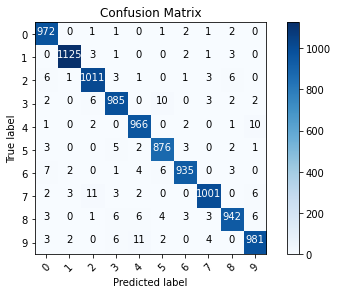

In [9]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion Matrix', 
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('normalized confusion matrix')
  else:
    print('confusion matrix without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 2 Predicted Label: 0')

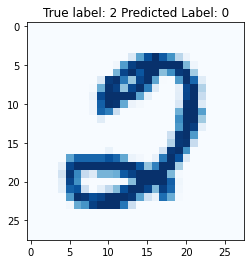

In [10]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap=plt.cm.Blues)
plt.title('True label: %s Predicted Label: %s' %(y_test[i], p_test[i]))